In [80]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.utils import to_categorical

In [81]:
# Load MNIST dataset
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

In [82]:
# noralize pixel value from 0 to 1
train_images=train_images/255.0
test_images=test_images/255.0


In [83]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [84]:
# reshape images as they are greayscale

train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [85]:
# conert labels into 1 hot encoded format
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [86]:
# build cnn model
model=models.Sequential()

In [87]:
# first convolutional layer
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

In [88]:
# second layer 

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

In [89]:
# third

model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [90]:
# 3d output to 1d and add dense layer 

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))

In [91]:
# 10 neurons
model.add(layers.Dense(10, activation="softmax"))


In [92]:
# compile the model 

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [93]:
# train model

model.fit(train_images,train_labels,epochs=10,batch_size=64,validation_data=(test_images,test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8738 - loss: 0.4223 - val_accuracy: 0.9805 - val_loss: 0.0634
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9843 - loss: 0.0527 - val_accuracy: 0.9861 - val_loss: 0.0430
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9910 - val_loss: 0.0285
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9880 - val_loss: 0.0405
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9894 - val_loss: 0.0337
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9924 - val_loss: 0.0285
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9895 - val_loss: 0.0320
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9964 - loss: 0.0122 - 

In [94]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test acc=",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0585
Test acc= 98.91999959945679


In [95]:
from joblib import dump, load

# Save the model
dump(model, 'model.joblib')

# Load the model
loaded_model = load('model.joblib')


In [96]:
predictions=model.predict(test_images)
print("prediction for first test image",np.argmax(predictions[41]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
prediction for first test image 7


In [97]:
import matplotlib.pyplot as plt

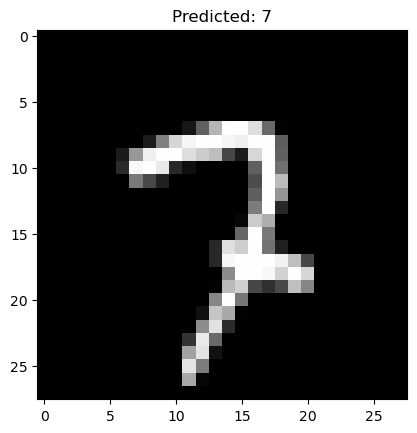

In [98]:
plt.imshow(test_images[41].reshape(28,28),cmap="gray")
plt.title(f"Predicted: {predictions[41].argmax()}")
plt.show()

In [99]:
from PIL import Image

In [116]:
image_path = 'pic5.png'  # Replace with your image path
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28 pixels
img = np.array(img) / 255.0  # Normalize pixel values
img = img.reshape(1, 28, 28, 1)  # Reshape to match model input

# Predict


In [117]:
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: 4


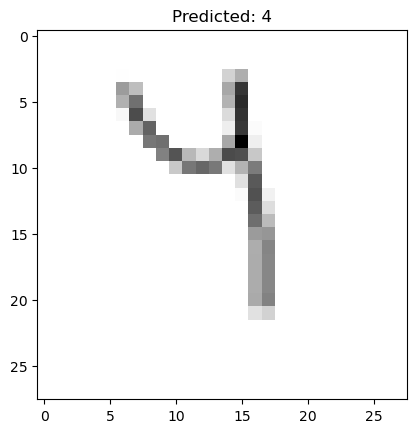

In [118]:
plt.imshow(img.reshape(28,28),cmap="gray")
plt.title(f"Predicted: {prediction.argmax()}")
plt.show()